## Multicollinearity

In [13]:
library(tidyverse)
library(caret)
Sys.setenv(LANG = "en")

In [14]:
data("Boston", package = "MASS")

In [15]:
model1 <- lm(medv ~., data = Boston)

In [16]:
?MASS::Boston

Boston {MASS},R Documentation


In [17]:
summary(model1)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

In [18]:
car::vif(model1)

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

In [27]:
model2 <- lm(medv ~. -tax, data = Boston)

In [28]:
summary(model2)


Call:
lm(formula = medv ~ . - tax, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.1449  -2.9143  -0.5661   1.7438  26.3113 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.463e+01  5.123e+00   6.760 3.92e-11 ***
crim        -1.067e-01  3.319e-02  -3.216 0.001384 ** 
zn           3.637e-02  1.351e-02   2.692 0.007354 ** 
indus       -6.778e-02  5.583e-02  -1.214 0.225317    
chas         3.029e+00  8.637e-01   3.507 0.000494 ***
nox         -1.870e+01  3.847e+00  -4.862 1.57e-06 ***
rm           3.912e+00  4.209e-01   9.294  < 2e-16 ***
age         -6.054e-04  1.333e-02  -0.045 0.963804    
dis         -1.488e+00  2.014e-01  -7.390 6.31e-13 ***
rad          1.346e-01  4.125e-02   3.262 0.001182 ** 
ptratio     -9.851e-01  1.317e-01  -7.478 3.48e-13 ***
black        9.546e-03  2.711e-03   3.521 0.000470 ***
lstat       -5.222e-01  5.121e-02 -10.198  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

In [29]:
library(MASS)

In [34]:
rcorr(as.matrix(Boston))

ERROR: Error in rcorr(as.matrix(Boston)): could not find function "rcorr"


In [35]:
cor(as.matrix(Boston))

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00000000,-0.20046922,0.40658341,-0.055891582,0.42097171,-0.21924670,0.35273425,-0.37967009,0.625505145,0.58276431,0.2899456,-0.38506394,0.4556215,-0.3883046
zn,-0.20046922,1.00000000,-0.53382819,-0.042696719,-0.51660371,0.31199059,-0.56953734,0.66440822,-0.311947826,-0.31456332,-0.3916785,0.17552032,-0.4129946,0.3604453
indus,0.40658341,-0.53382819,1.00000000,0.062938027,0.76365145,-0.39167585,0.64477851,-0.70802699,0.595129275,0.72076018,0.3832476,-0.35697654,0.6037997,-0.4837252
chas,-0.05589158,-0.04269672,0.06293803,1.000000000,0.09120281,0.09125123,0.08651777,-0.09917578,-0.007368241,-0.03558652,-0.1215152,0.04878848,-0.0539293,0.1752602
nox,0.42097171,-0.51660371,0.76365145,0.091202807,1.00000000,-0.30218819,0.73147010,-0.76923011,0.611440563,0.66802320,0.1889327,-0.38005064,0.5908789,-0.4273208
rm,-0.21924670,0.31199059,-0.39167585,0.091251225,-0.30218819,1.00000000,-0.24026493,0.20524621,-0.209846668,-0.29204783,-0.3555015,0.12806864,-0.6138083,0.6953599
age,0.35273425,-0.56953734,0.64477851,0.086517774,0.73147010,-0.24026493,1.00000000,-0.74788054,0.456022452,0.50645559,0.2615150,-0.27353398,0.6023385,-0.3769546
dis,-0.37967009,0.66440822,-0.70802699,-0.099175780,-0.76923011,0.20524621,-0.74788054,1.00000000,-0.494587930,-0.53443158,-0.2324705,0.29151167,-0.4969958,0.2499287
rad,0.62550515,-0.31194783,0.59512927,-0.007368241,0.61144056,-0.20984667,0.45602245,-0.49458793,1.000000000,0.91022819,0.4647412,-0.44441282,0.4886763,-0.3816262
tax,0.58276431,-0.31456332,0.72076018,-0.035586518,0.66802320,-0.29204783,0.50645559,-0.53443158,0.910228189,1.00000000,0.4608530,-0.44180801,0.5439934,-0.4685359


## Multicollinearity 2

In [32]:
# load packages
library(MASS)
library(mvtnorm)

# set number of observations
n <- 50

# initialize vectors of coefficients
coefs1 <- cbind("hat_beta_1" = numeric(10000), "hat_beta_2" = numeric(10000))
coefs2 <- coefs1

# set seed
set.seed(1)

# loop sampling and estimation
for (i in 1:10000) {
  
  # for cov(X_1,X_2) = 0.25
  X <- rmvnorm(n, c(50, 100), sigma = cbind(c(10, 2.5), c(2.5, 10)))
  u <- rnorm(n, sd = 5)
  Y <- 5 + 2.5 * X[, 1] + 3 * X[, 2] + u
  coefs1[i, ] <- lm(Y ~ X[, 1] + X[, 2])$coefficients[-1]
  
  # for cov(X_1,X_2) = 0.85
  X <- rmvnorm(n, c(50, 100), sigma = cbind(c(10, 8.5), c(8.5, 10)))
  Y <- 5 + 2.5 * X[, 1] + 3 * X[, 2] + u
  coefs2[i, ] <- lm(Y ~ X[, 1] + X[, 2])$coefficients[-1]
  
}

# obtain variance estimates
diag(var(coefs1))
#> hat_beta_1 hat_beta_2 
#> 0.05674375 0.05712459
diag(var(coefs2))
#> hat_beta_1 hat_beta_2 
#>  0.1904949  0.1909056

hat_beta_1 hat_beta_2 
0.05674375 0.05712459

hat_beta_1 hat_beta_2 
 0.1904949  0.1909056

### MC 3

#### Hypothesis testing and confidence intervals

In [33]:
mod <- lm(packs~price+income, data = df)
summary(mod)

ERROR: Error in model.frame.default(formula = packs ~ price + income, data = df, : 'data' must be a data.frame, environment, or list


In [ ]:
coeftest(mod)

In [ ]:
coeftest(mod, df = Inf)

In [ ]:
# install.packages("sandwich")
# library(sandwich)
# coeftest(mod, vcov=vcovHC, type = "HC3")

In [ ]:
confint(mod)
# confint(mod, df=Inf, vcov=vcovHC, type = "HC3")

In [ ]:
## note that the degrees of freedom _actually used_ can be extracted
df.residual(ct)
## which differ here from
df.residual(mod)

df.residual(coeftest(mod, df = Inf))

### Multicollinearity

In [ ]:
df['logpi'] = df['income'] - df['price'] 

In [ ]:
summary(lm(packs~price+logpi, data=df))
summary(lm(packs~price+income, data=df))

In [ ]:
summary(lm(packs~price+income, data=df))

$$F(k-1, n-k)=\dfrac{ESS/(k-1)}{RSS/(n-k)} = \dfrac{R^2/(k-1)}{(1-R^2)/(n-k)}  $$

In [ ]:
cor(df, method='pearson')

In [ ]:
rcorr(as.matrix(df))

In [ ]:
pairs(df)

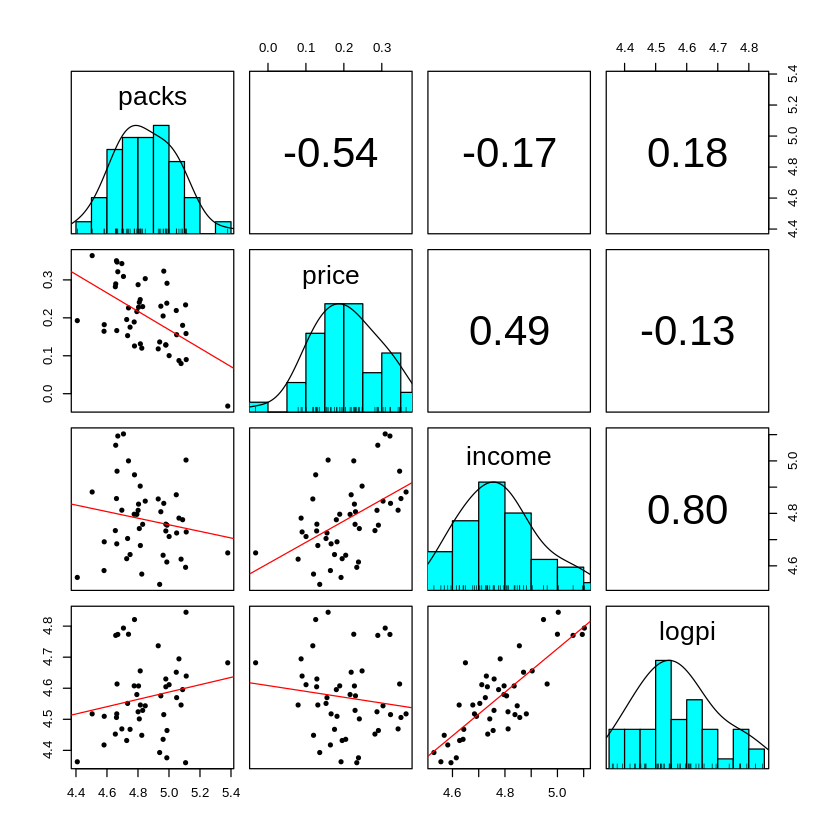

In [ ]:
pairs.panels(df,lm=T, ellipses=F, method = 'pearson')